## **Analisis Saham Individual**

In [2]:
# Install library untuk mengambil data dari Yahoo Finance
!pip install yfinance

import yfinance as yf
bbri = yf.download("BBRI.JK", start="2024-12-01", end="2025-04-15")

bbri['return'] = bbri['Close'].pct_change()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Install paket untuk membuat plot
import matplotlib.pyplot as plt

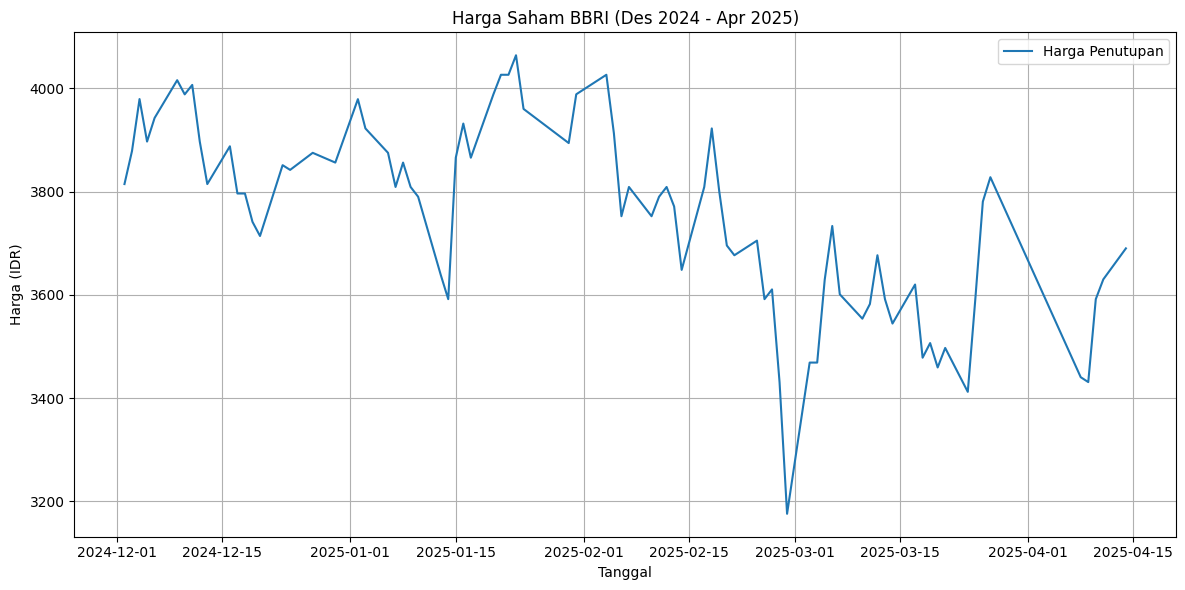

In [3]:
# Plot harga saham
plt.figure(figsize=(12, 6))
plt.plot(bbri.index, bbri['Close'], label='Harga Penutupan')
plt.title('Harga Saham BBRI (Des 2024 - Apr 2025)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (IDR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

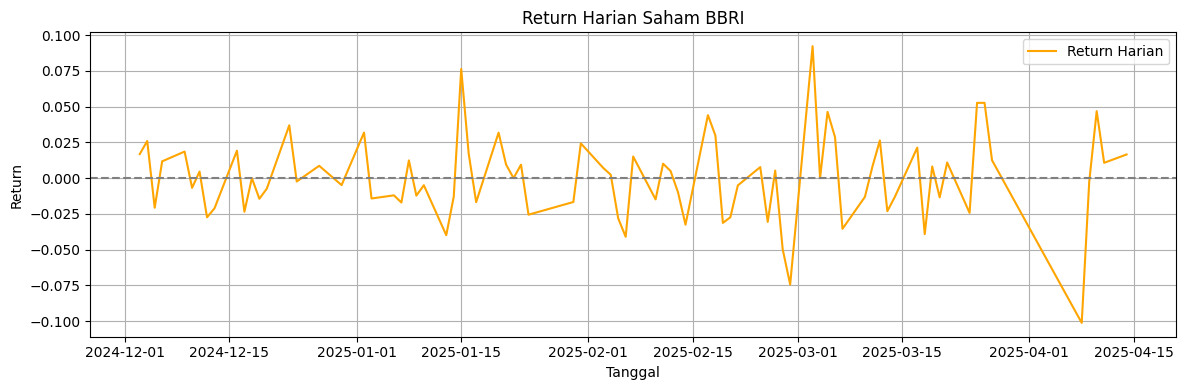

In [4]:
# Plot return harian
plt.figure(figsize=(12, 4))
plt.plot(bbri.index, bbri['return'], label='Return Harian', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Return Harian Saham BBRI')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## **Analisis Portofolio Saham**

[*********************100%***********************]  3 of 3 completed


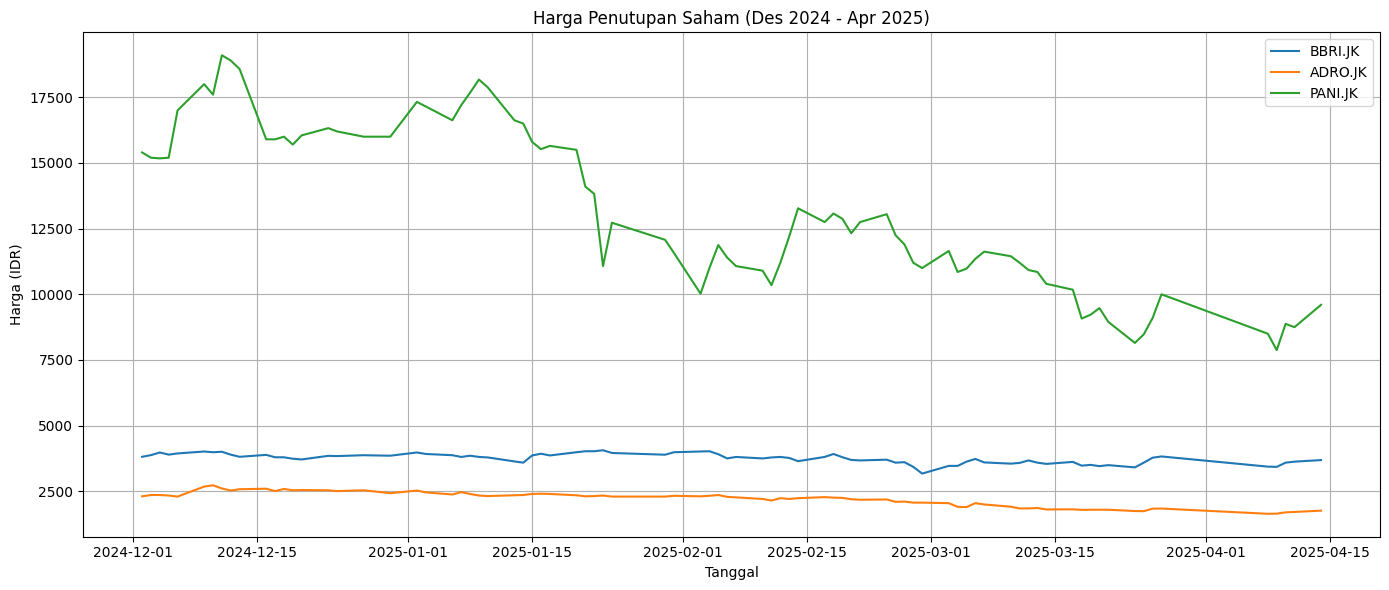

In [19]:
# Analisis portofolio dengan 3 saham: BBRI, ADRO, PANI

# Daftar saham yang akan dibandingkan
tickers = ['BBRI.JK', 'ADRO.JK', 'PANI.JK']
start_date = "2024-12-01"
end_date = "2025-04-15"

# Unduh data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Plot harga penutupan masing-masing saham
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Harga Penutupan Saham (Des 2024 - Apr 2025)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

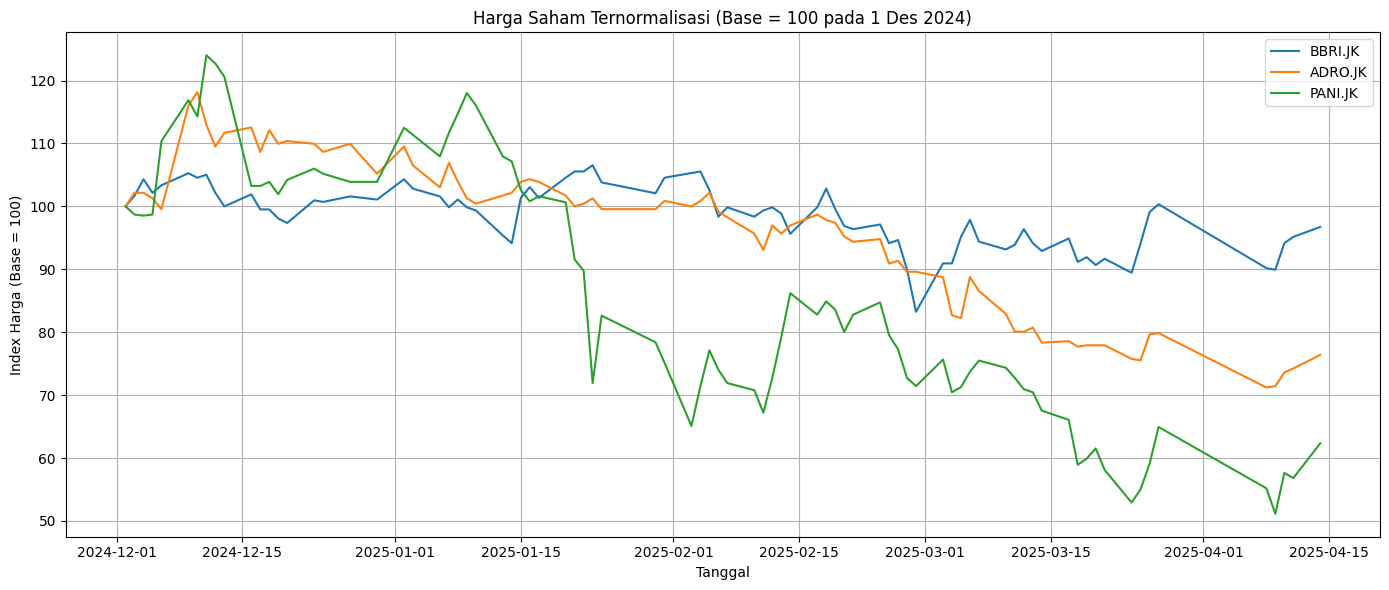

In [20]:
# Membandingkan dan menormalisasi harga saham dalam portofolio (hari pertama = 100)

indexed_data = data / data.iloc[0] * 100

# Plot indeks harga
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(indexed_data.index, indexed_data[ticker], label=ticker)

plt.title('Harga Saham Ternormalisasi (Base = 100 pada 1 Des 2024)')
plt.xlabel('Tanggal')
plt.ylabel('Index Harga (Base = 100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

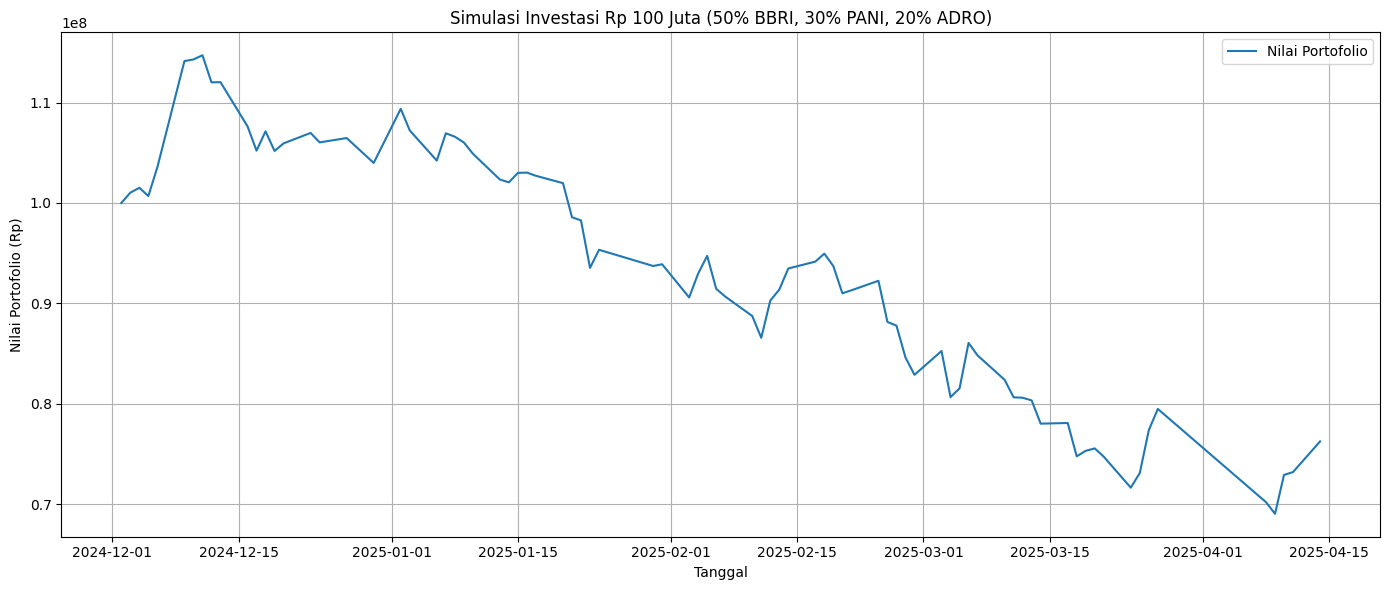

Nilai akhir portofolio: Rp 76,251,364
Return total: -23.75%


In [21]:
# Simulasi investasi dengan Rp100 juta, 50% BBRI, 30% PANI, 20% ADRO

# Tentukan alokasi dan investasi awal
weights = {'BBRI.JK': 0.5, 'PANI.JK': 0.3, 'ADRO.JK': 0.2}
initial_investment = 100_000_000  # Rp 100 juta

# Hitung return kumulatif
cumulative_returns = data / data.iloc[0]

# Hitung nilai portofolio harian
portfolio_value = cumulative_returns.mul([weights[t] * initial_investment for t in tickers], axis=1)
portfolio_value['Total'] = portfolio_value.sum(axis=1)

# Nilai akhir & return total
final_value = portfolio_value['Total'].iloc[-1]
final_return = (final_value - initial_investment) / initial_investment * 100

# Visualisasi
plt.figure(figsize=(14, 6))
plt.plot(portfolio_value.index, portfolio_value['Total'], label='Nilai Portofolio')
plt.title('Simulasi Investasi Rp 100 Juta (50% BBRI, 30% PANI, 20% ADRO)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Portofolio (Rp)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tampilkan hasil
print(f"Nilai akhir portofolio: Rp {final_value:,.0f}")
print(f"Return total: {final_return:.2f}%")

In [22]:
# Hitung Sharpe ratio

import pandas as pd
import numpy as np

# Bandingkan dengan risk-free rate
risk_free_rate = 0.04 / 252  # risk-free return harian (4% tahunan)

# Unduh data
daily_returns = data.pct_change().dropna()

# Return portofolio harian
portfolio_daily_return = (daily_returns * pd.Series(weights)).sum(axis=1)

# Hitung excess return dan Sharpe Ratio
excess_return = portfolio_daily_return - risk_free_rate
sharpe_ratio = np.mean(excess_return) / np.std(portfolio_daily_return) * np.sqrt(252)

print(f"📊 Sharpe Ratio: {sharpe_ratio:.2f}")

# > 2.0	Sangat bagus (efisien & tinggi return)
# 1.0 – 2.0	Baik (risiko wajar terhadap return)
# 0.5 – 1.0	Cukup, tapi risiko agak besar
# < 0.5	Buruk, risiko tidak sebanding dengan return
# < 0	Merugi, bahkan lebih buruk dari risk-free

📊 Sharpe Ratio: -0.96


In [23]:
# Hitung volatilitas tahunan

# Volatilitas tahunan (standar deviasi return harian * sqrt(252))
annual_volatility = np.std(portfolio_daily_return) * np.sqrt(252)

print(f"📉 Volatilitas Tahunan Portofolio: {annual_volatility:.2%}")

📉 Volatilitas Tahunan Portofolio: 48.25%


In [24]:
# Menghitung Value-at-Risk (VaR) pada confidence level 95%
confidence_level = 0.95
VaR_pct = np.percentile(portfolio_daily_return, (1 - confidence_level) * 100)
VaR_nominal = abs(VaR_pct * initial_investment)

print(f"📉 Value-at-Risk (VaR) 95%: {VaR_pct:.2%} atau sekitar Rp {VaR_nominal:,.0f} dalam 1 hari")

📉 Value-at-Risk (VaR) 95%: -4.45% atau sekitar Rp 4,453,336 dalam 1 hari


In [27]:
# Bandingkan dengan IHSG

# Unduh data JKSE
benchmark = '^JKSE'
data = yf.download(tickers + [benchmark], start=start_date, end=end_date)['Close']
benchmark_return = daily_returns[benchmark]

# Confidence level
confidence_level = 0.95

# VaR dalam persentase
VaR_portfolio_pct = np.percentile(portfolio_return, (1 - confidence_level) * 100)
VaR_benchmark_pct = np.percentile(benchmark_return, (1 - confidence_level) * 100)

# VaR dalam nominal
VaR_portfolio_nom = abs(VaR_portfolio_pct * initial_investment)
VaR_benchmark_nom = abs(VaR_benchmark_pct * initial_investment)

print(f"📊 VaR Portofolio (95%): {VaR_portfolio_pct:.2%} ≈ Rp {VaR_portfolio_nom:,.0f}")
print(f"📉 VaR IHSG (95%):       {VaR_benchmark_pct:.2%} ≈ Rp {VaR_benchmark_nom:,.0f}")

# Jika VaR portofolio lebih kecil dari IHSG, artinya portofolio kamu lebih defensif / stabil.
# Jika lebih besar, berarti lebih agresif / volatile.

[*********************100%***********************]  4 of 4 completed

📊 VaR Portofolio (95%): -4.45% ≈ Rp 4,453,336
📉 VaR IHSG (95%):       -2.14% ≈ Rp 2,135,961


<ipython-input-28-73125577d4d4>:22: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


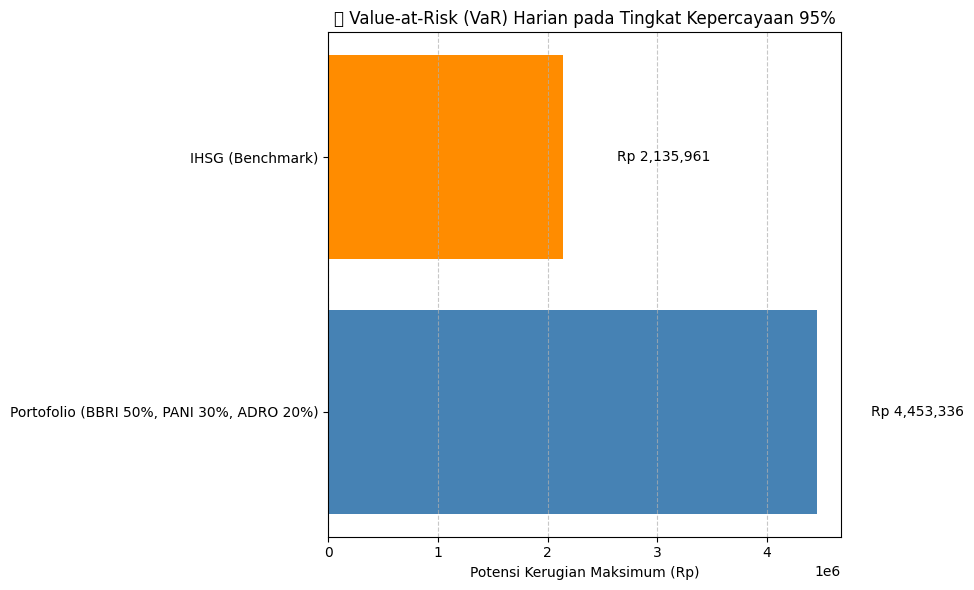

In [28]:
# Konfigurasi portofolio & benchmark
portfolio_label = "Portofolio (BBRI 50%, PANI 30%, ADRO 20%)"
benchmark_label = "IHSG (Benchmark)"

# Data untuk plot
labels = [portfolio_label, benchmark_label]
values = [VaR_portfolio_nom, VaR_benchmark_nom]

# Visualisasi
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=['steelblue', 'darkorange'])
plt.title("📉 Value-at-Risk (VaR) Harian pada Tingkat Kepercayaan 95%")
plt.xlabel("Potensi Kerugian Maksimum (Rp)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tambahkan label angka di bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 500_000, bar.get_y() + bar.get_height()/2,
             f"Rp {width:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-29-f8c967b72965>:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


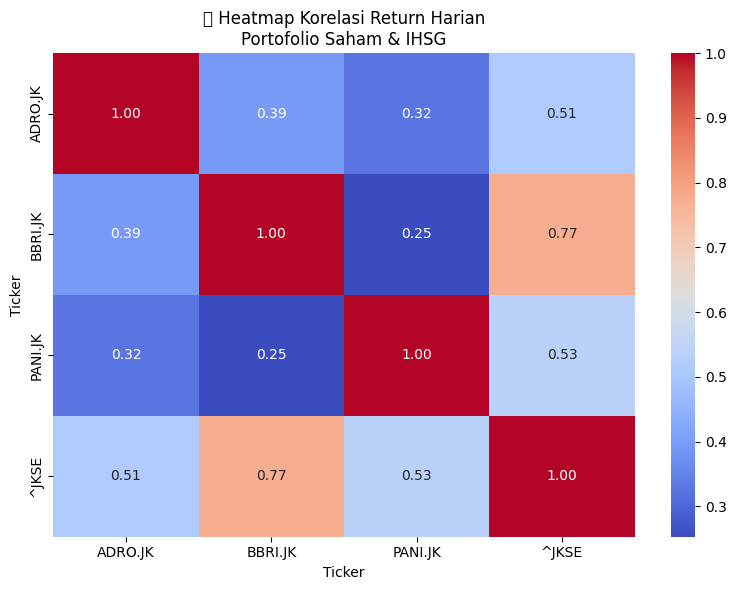

In [29]:
# Buat Analisis Heatmap
!pip install seaborn
import seaborn as sns

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Heatmap Korelasi Return Harian\nPortofolio Saham & IHSG")
plt.tight_layout()
plt.show()

# Nilai mendekati +1: sangat berkorelasi positif
# Nilai mendekati -1: berkorelasi negatif
# Nilai mendekati 0: tidak berkorelasi signifikan

<ipython-input-30-b4aed9e00103>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


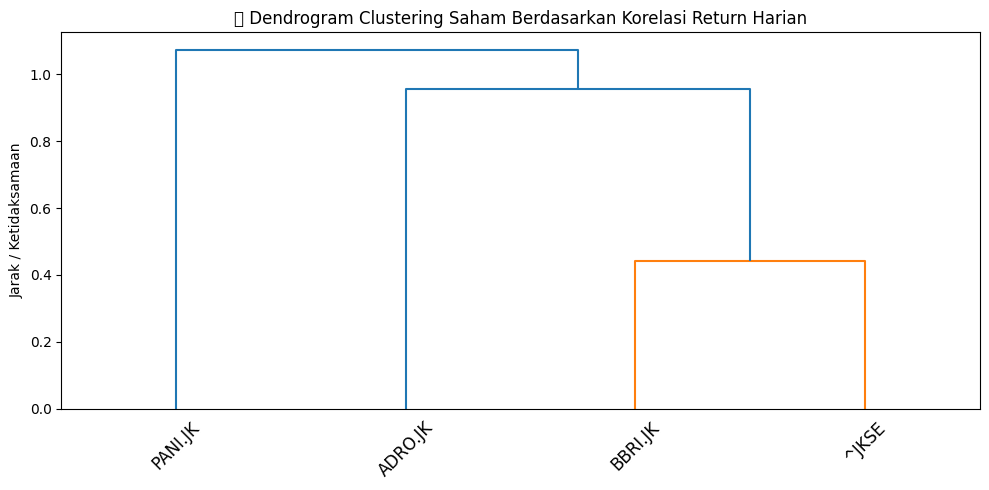

In [30]:
# Analisis clustering menggunakan dendogram

!pip install scipy
from scipy.cluster.hierarchy import linkage, dendrogram

returns = data.pct_change().dropna()

# Matriks korelasi
corr_matrix = returns.corr()

# Clustering linkage
link = linkage(corr_matrix, method='ward')

# Visualisasi dendrogram
plt.figure(figsize=(10, 5))
dendrogram(link, labels=corr_matrix.columns, leaf_rotation=45)
plt.title("📊 Dendrogram Clustering Saham Berdasarkan Korelasi Return Harian")
plt.ylabel("Jarak / Ketidaksamaan")
plt.tight_layout()
plt.show()

# Cabang yang dekat artinya return-nya saling mirip
# Gunakan ini untuk identifikasi diversifikasi yang kurang (misal: dua saham selalu bergerak bareng)

In [31]:
# Analisis cointegration

!pip install statsmodels
from statsmodels.tsa.stattools import coint

# Uji cointegration setiap pasangan saham
results = {}
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        stock1 = tickers[i]
        stock2 = tickers[j]
        score, pvalue, _ = coint(data[stock1], data[stock2])
        results[f"{stock1} vs {stock2}"] = pvalue

# Urutkan berdasarkan p-value
sorted_results = dict(sorted(results.items(), key=lambda item: item[1]))

# Tampilkan hasil
for pair, pval in sorted_results.items():
    status = "✅ Cointegrated" if pval < 0.05 else "❌ Not cointegrated"
    print(f"{pair}: p-value = {pval:.4f} → {status}")

# ✅ Cointegrated (p < 0.05): ada hubungan jangka panjang yang stabil → cocok untuk pair trading
# ❌ Tidak cointegrated → return saling bebas, cocok untuk diversifikasi

BBRI.JK vs ADRO.JK: p-value = 0.0151 → ✅ Cointegrated
BBRI.JK vs PANI.JK: p-value = 0.0494 → ✅ Cointegrated
PANI.JK vs ADRO.JK: p-value = 0.1465 → ❌ Not cointegrated
